In [90]:
import hdbscan

In [91]:
from sklearn import metrics
import datetime
import pandas as pd
import numpy as np
import hdbscan
from matplotlib import pyplot as plt


In [115]:
trips_one_month = pd.read_csv('.\RExtractor\output\JC-201901-citibike-tripdata.csv')
stations = pd.read_csv('.\RExtractor\output\stationTable.csv')
ride = pd.read_csv('.\RExtractor\output\Test.csv')

In [93]:
def convertStringToDatetime(day, month, year, hour, minute, second):
    date_time_str = str(year)+'-'+str(month)+'-'+str(day)+' '+str(hour)+':'+str(minute)+':'+str(round(second,3))
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
    date_time_obj = pd.to_datetime(date_time_obj)
    return date_time_obj



In [163]:
def getDateData(dataset) : 
    dataset = dataset.reset_index(drop=True)
    s_day = dataset['start_day']
    s_month = dataset['start_month']
    s_year = dataset['start_year']
    s_hour = dataset['start_hour']
    s_minute = dataset['start_minute']
    s_second = dataset['start_second']

    e_day = dataset['end_day']
    e_month = dataset['end_month']
    e_year = dataset['end_year']
    e_hour = dataset['end_hour']
    e_minute = dataset['end_minute']
    e_second = dataset['end_second']
    
    data_s = []
    data_e = []
    data_diff = []
    for i in range(len(dataset)):
        start_date = convertStringToDatetime(s_day[i], s_month[i], s_year[i], s_hour[i], s_minute[i], s_second[i])
        end_date = convertStringToDatetime(e_day[i], e_month[i], e_year[i], e_hour[i], e_minute[i], e_second[i])
        # data.append([start_date, end_date]) 
        data_s.append(start_date.timestamp())
        data_e.append(end_date.timestamp())
        # data_list.append([start_date.timestamp(), end_date.timestamp()])
        delta = end_date-start_date
        data_diff.append(delta.total_seconds())
    return data_s, data_e, data_diff


Test MSE: 2041477.334


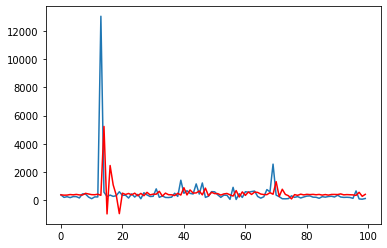

In [125]:
# Autoregression pour estimer le temps de trajet à partir d'une date de départ
from statsmodels.tsa.ar_model import AR
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
data_s, data_e, data_diff = getDateData(trips_one_month)

train, test = data_diff[0:100], data_diff[100:200]
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [89]:
# TODO : faire couple start/end -> on a le départ et on prédit l'arrivée
# Todo : faire une prédiction du flux moyen sur la durée pour une station
# Pour un moment donnée, pour une station donnée, combien il y aura de vélos
# TODO estimer le nombre de vélo qui arrivent à une station au cours du mois
# TODO estimer le nombre de vélo qui sortent à une station au cours du mois

In [116]:
trips_one_month

,tripduration,start_station_id,end_station_id,bikeid,usertype,birth.year,gender,start_day,start_month,start_year,start_hour,start_minute,start_second,end_day,end_month,end_year,end_hour,end_minute,end_second
0,201,3183,3214,29612,Subscriber,1993,1,1,1,2019,3,9,9.711,1,1,2019,3,12,30.879
1,505,3183,3638,29213,Subscriber,1972,2,1,1,2019,5,18,0.106,1,1,2019,5,26,25.905
2,756,3183,3192,26164,Subscriber,1985,1,1,1,2019,10,36,33.340,1,1,2019,10,49,10.260
3,1575,3183,3638,29672,Customer,1969,0,1,1,2019,12,43,38.643,1,1,2019,13,9,54.528
4,1566,3183,3638,29522,Customer,1969,0,1,1,2019,12,43,39.601,1,1,2019,13,9,46.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19671,853,3694,3183,26293,Subscriber,1977,1,26,1,2019,6,40,17.332,26,1,2019,6,54,30.888
19672,936,3694,3183,26291,Subscriber,1977,1,27,1,2019,6,36,20.640,27,1,2019,6,51,57.146
19673,653,3694,3677,26188,Customer,1998,2,27,1,2019,21,14,8.546,27,1,2019,21,25,1.617
19674,960,3694,3183,26196,Subscriber,1977,1,29,1,2019,6,15,26.588,29,1,2019,6,31,26.730


In [164]:

dataset_station_s = trips_one_month[trips_one_month.start_station_id == 3183]
dataset_station_e = trips_one_month[trips_one_month.end_station_id == 3183]


In [165]:
data_s,_, _ = getDateData(dataset_station_s)
_ ,data_e, _ = getDateData(dataset_station_e)


In [143]:
    s_day = dataset_station_e['start_day']
    s_month = dataset_station_e['start_month']
    s_year = dataset_station_e['start_year']
    s_hour = dataset['start_hour']
    s_minute = dataset['start_minute']
    s_second = dataset['start_second']l

    e_day = dataset['end_day']
    e_month = dataset['end_month']
    e_year = dataset['end_year']
    e_hour = dataset['end_hour']
    e_minute = dataset['end_minute']
    e_second = dataset['end_second']
    
    data_s = []
    data_e = []
    data_diff = []
    for i in range(len(dataset)):
        start_date = convertStringToDatetime(s_day[i], s_month[i], s_year[i], s_hour[i], s_minute[i], s_second[i])
        end_date = convertStringToDatetime(e_day[i], e_month[i], e_year[i], e_hour[i], e_minute[i], e_second[i])
        # data.append([start_date, end_date]) 
        data_s.append(start_date.timestamp())
        data_e.append(end_date.timestamp())
        # data_list.append([start_date.timestamp(), end_date.timestamp()])
        delta = end_date-start_date
        data_diff.append(delta.total_seconds())
    return data_s, data_e, data_diff

,tripduration,start_station_id,end_station_id,bikeid,usertype,birth.year,gender,start_day,start_month,start_year,start_hour,start_minute,start_second,end_day,end_month,end_year,end_hour,end_minute,end_second
14,111,3183,3183,29453,Subscriber,1987,1,1,1,2019,21,52,9.298,1,1,2019,21,54,0.455
15,663,3183,3183,29286,Subscriber,1987,1,1,1,2019,21,54,27.936,1,1,2019,22,5,31.880
28,2602,3183,3183,29286,Customer,1969,0,2,1,2019,12,27,14.636,2,1,2019,13,10,37.224
29,1360,3183,3183,26208,Customer,1971,1,2,1,2019,12,32,56.996,2,1,2019,12,55,37.792
37,1187,3183,3183,29508,Customer,1969,0,2,1,2019,16,59,39.356,2,1,2019,17,19,26.624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19670,991,3694,3183,29530,Subscriber,1977,1,25,1,2019,6,19,31.821,25,1,2019,6,36,3.223
19671,853,3694,3183,26293,Subscriber,1977,1,26,1,2019,6,40,17.332,26,1,2019,6,54,30.888
19672,936,3694,3183,26291,Subscriber,1977,1,27,1,2019,6,36,20.640,27,1,2019,6,51,57.146
19674,960,3694,3183,26196,Subscriber,1977,1,29,1,2019,6,15,26.588,29,1,2019,6,31,26.730
